In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
train_merged_data = pd.read_csv("train_df.csv", encoding_errors = "ignore")
test_merged_data = pd.read_csv("test_df.csv", encoding_errors = "ignore")

In [4]:
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])

In [5]:
test_merged_data['Date'] = pd.to_datetime(test_merged_data['Date'])

In [6]:
train_merged_data

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,2013-01-01,1115,2,0,0,1,1,3,2,5350.0,...,2,2013,1,1,1,1,9.493619,1,0,0
1,2013-01-01,379,2,0,0,1,1,3,0,6630.0,...,3,2013,1,1,1,1,9.493619,1,0,0
2,2013-01-01,378,2,0,0,1,1,0,2,2140.0,...,3,2013,1,1,1,1,9.493619,1,0,0
3,2013-01-01,377,2,0,0,1,1,0,2,100.0,...,0,2013,1,1,1,1,9.493619,1,0,0
4,2013-01-01,376,2,0,0,1,1,0,0,160.0,...,3,2013,1,1,1,1,9.493619,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2015-07-31,746,5,1,1,0,1,3,2,4330.0,...,2,2015,7,31,0,3,14.235110,0,0,1
1017205,2015-07-31,747,5,1,1,0,1,2,2,45740.0,...,3,2015,7,31,0,3,12.963680,0,0,1
1017206,2015-07-31,748,5,1,1,0,1,3,0,2380.0,...,1,2015,7,31,0,3,12.942907,0,0,1
1017207,2015-07-31,742,5,1,1,0,1,3,2,4380.0,...,3,2015,7,31,0,3,10.295276,0,0,1


In [7]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Date                       1017209 non-null  datetime64[ns]
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Open                       1017209 non-null  int64         
 4   Promo                      1017209 non-null  int64         
 5   StateHoliday               1017209 non-null  int64         
 6   SchoolHoliday              1017209 non-null  int64         
 7   StoreType                  1017209 non-null  int64         
 8   Assortment                 1017209 non-null  int64         
 9   CompetitionDistance        1017209 non-null  float64       
 10  CompetitionOpenSinceMonth  1017209 non-null  float64       
 11  CompetitionOpenSinceYear   1017209 no

In [8]:
train_merged_data.isnull().sum()

Date                         0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
weekDay                      0
IsWeekday                    0
Quarter                      0
SalesPerCustomer             0
IsMonthStart                 0
IsMonthMiddle                0
IsMonthEnd                   0
dtype: int64

In [9]:
train_merged_data.describe()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,1.207467e+00,9.351412e-01,5.430086e+03,7.222866e+00,...,1.978094e+00,2.013832e+03,5.846762e+00,1.570279e+01,5.720594e-01,2.294252e+00,9.493619e+00,3.291752e-02,3.621036e-01,3.291851e-02
std,3.219087e+02,1.997391e+00,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,1.365376e+00,9.938011e-01,7.705298e+03,2.652674e+00,...,1.119589e+00,7.773960e-01,3.326097e+00,8.787638e+00,4.947804e-01,1.081850e+00,2.002079e+00,1.784208e-01,4.806088e-01,1.784234e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,...,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,...,1.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,0.000000e+00,1.000000e+00,8.169643e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,7.222866e+00,...,2.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,1.000000e+00,2.000000e+00,9.493619e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,9.000000e+00,...,3.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,1.000000e+00,3.000000e+00,1.051098e+01,0.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,...,3.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,1.000000e+00,4.000000e+00,6.495785e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
train_merged_data.dtypes

Date                         datetime64[ns]
Store                                 int64
DayOfWeek                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
Year                                  int64
Month                                 int64
weekDay                               int64
IsWeekday                             int64
Quarter                               int64
SalesPerCustomer                    float64
IsMonthStart                    

In [11]:
train_merged_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

## Trend Analysis

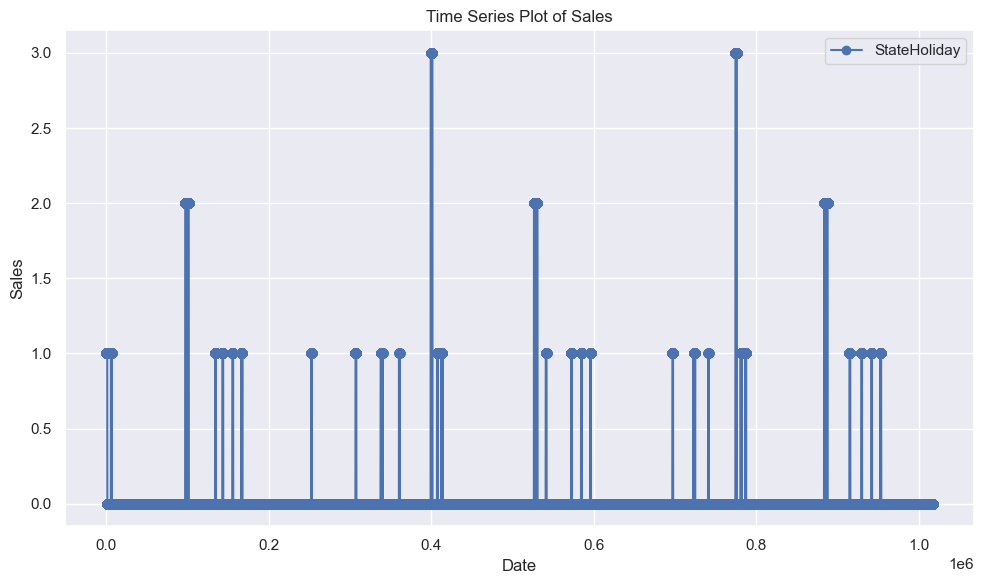

In [12]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(train_merged_data['StateHoliday'], marker='o', linestyle='-', color='b', label='StateHoliday')

# Customize the plot
ax.set_title('Time Series Plot of Sales')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend(loc='best')
ax.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [13]:
# Define a list of relevant column names
relevant_columns = ['Date', 'Store', 'SalesPerCustomer']
# Extract the relevant columns
selected_data = train_merged_data[relevant_columns]

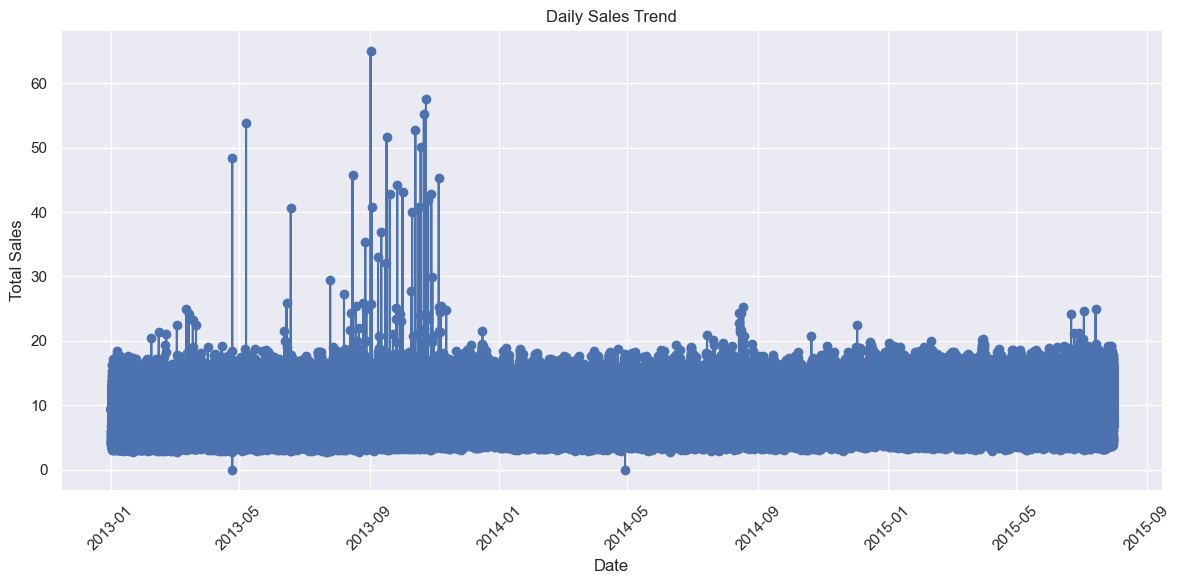

In [14]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line chart
ax.plot(train_merged_data['Date'], train_merged_data['SalesPerCustomer'], marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_title('Daily Sales Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.grid(True)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlaps
fig.tight_layout()

# Display the plot
plt.show()

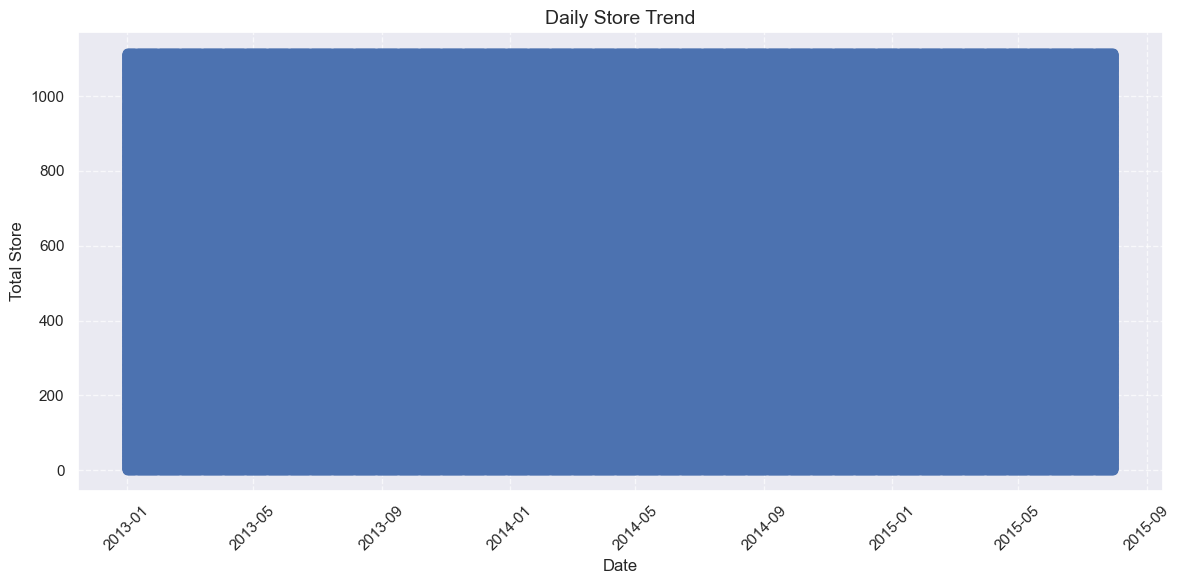

In [15]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the line chart
ax.plot(train_merged_data['Date'], train_merged_data['Store'], marker='o', linestyle='-', color='b')

# Customize the plot
ax.set_title('Daily Store Trend', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Store', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlaps
fig.tight_layout()

# Display the plot
plt.show()

In [16]:
# Assuming you have a DataFrame named 'train_data_merged'
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])
quarterly_sales = train_merged_data.resample('Q', on='Date')['SalesPerCustomer'].sum()

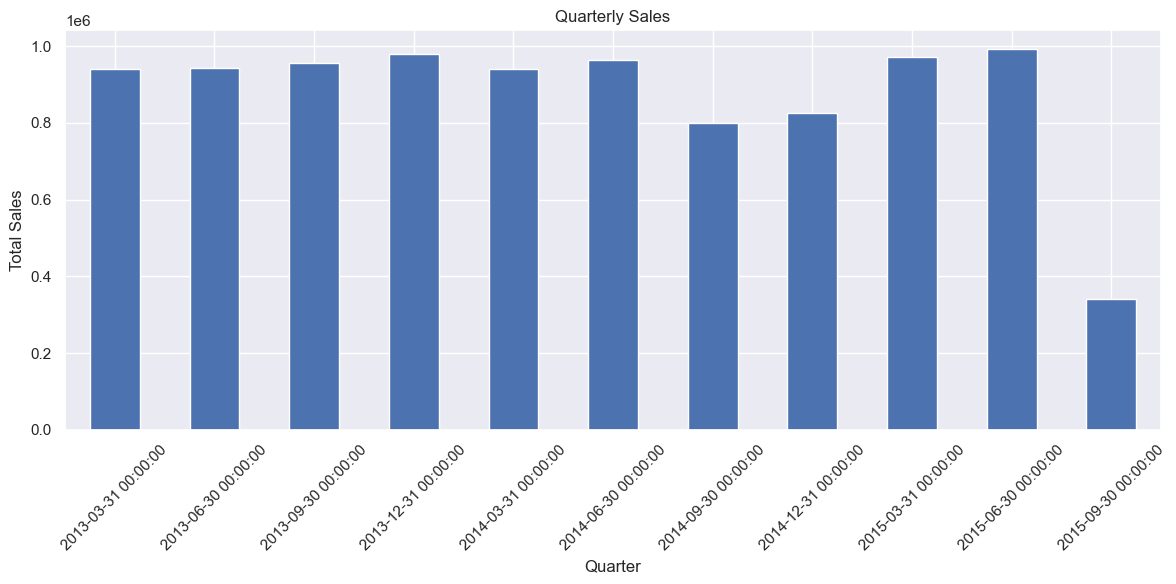

In [17]:
plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='bar', color='b')
plt.title('Quarterly Sales')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Resample Monthly and Calculate Sum:
monthly_sales = train_merged_data.resample('M', on='Date')['SalesPerCustomer'].sum()

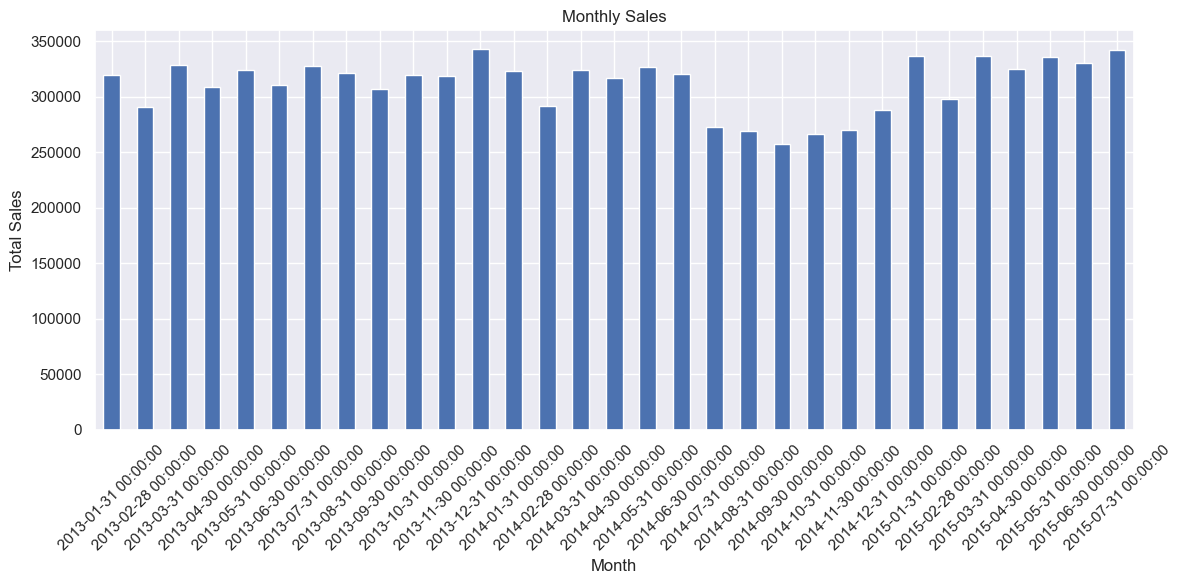

In [19]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='b')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

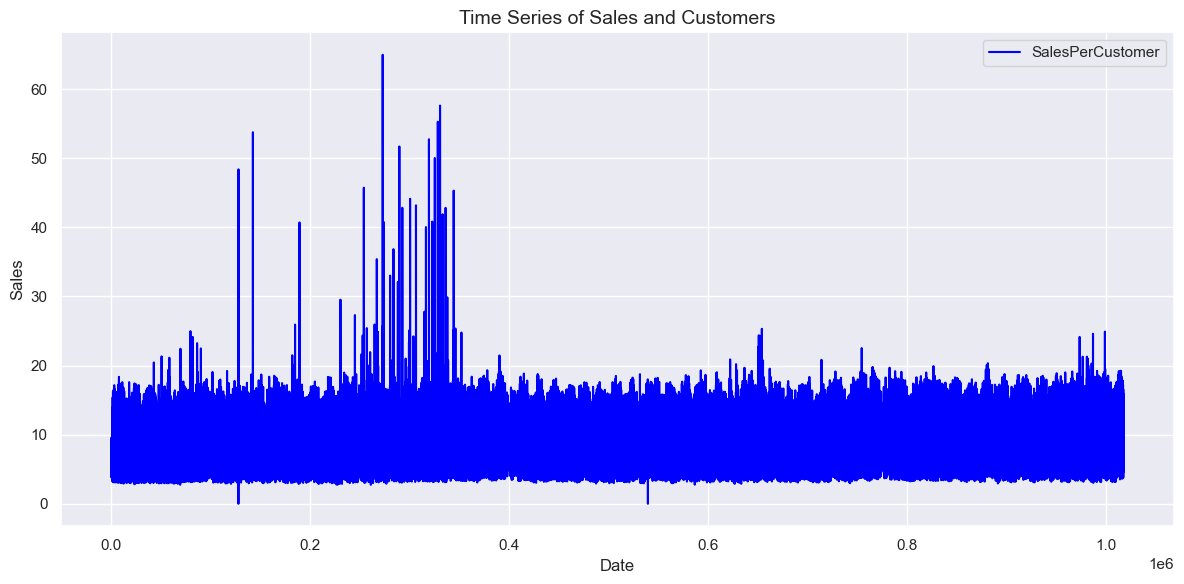

In [20]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series data
ax.plot(train_merged_data.index, train_merged_data['SalesPerCustomer'], label='SalesPerCustomer', color='blue')

# Customize the plot
ax.set_title('Time Series of Sales and Customers', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend()
ax.grid(True)

# Adjust layout to prevent overlaps
fig.tight_layout()

# Display the plot
plt.show()

In [21]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       41088 non-null  datetime64[ns]
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int64         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int64         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYear   41088 non-null  float64       
 12  Prom

In [22]:
test_merged_data['SalesPerCustomer'] = test_merged_data['Date']

In [23]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       41088 non-null  datetime64[ns]
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int64         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int64         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYear   41088 non-null  float64       
 12  Prom

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(test_merged_data['SalesPerCustomer'], model='additive', period=365)
trend_data = decomposition.trend

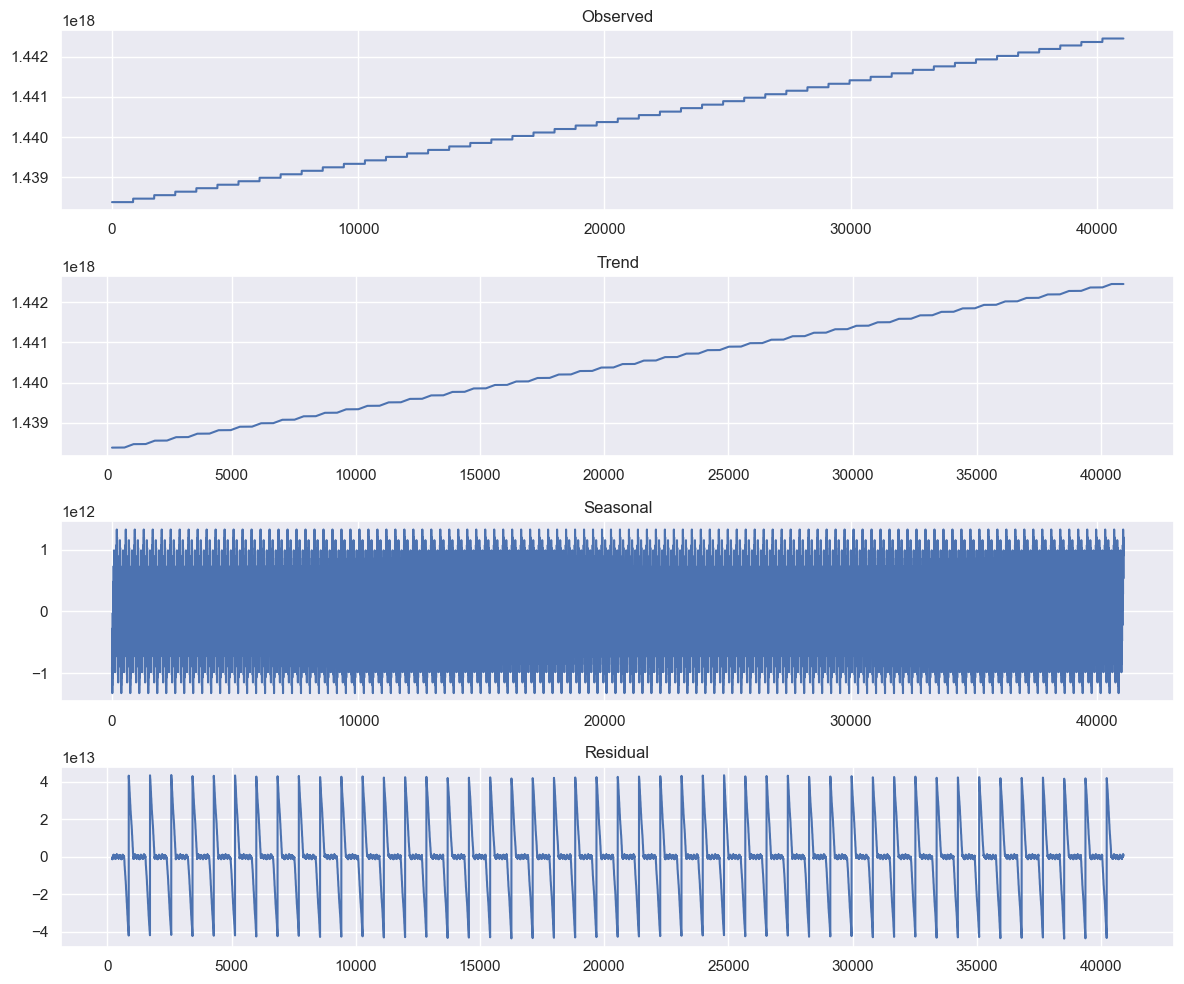

In [25]:
import matplotlib.pyplot as plt

# Titles for each subplot
titles = ['Observed', 'Trend', 'Seasonal', 'Residual']
data = [decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid]

# Create the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# Loop through axes and plot data
for ax, title, series in zip(axes, titles, data):
    ax.set_title(title)
    ax.plot(series)
    ax.grid(True)  # Optional: Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
decomposition = seasonal_decompose(test_merged_data['SalesPerCustomer'], model='multiplicative', period=365)
trend_data = decomposition.trend

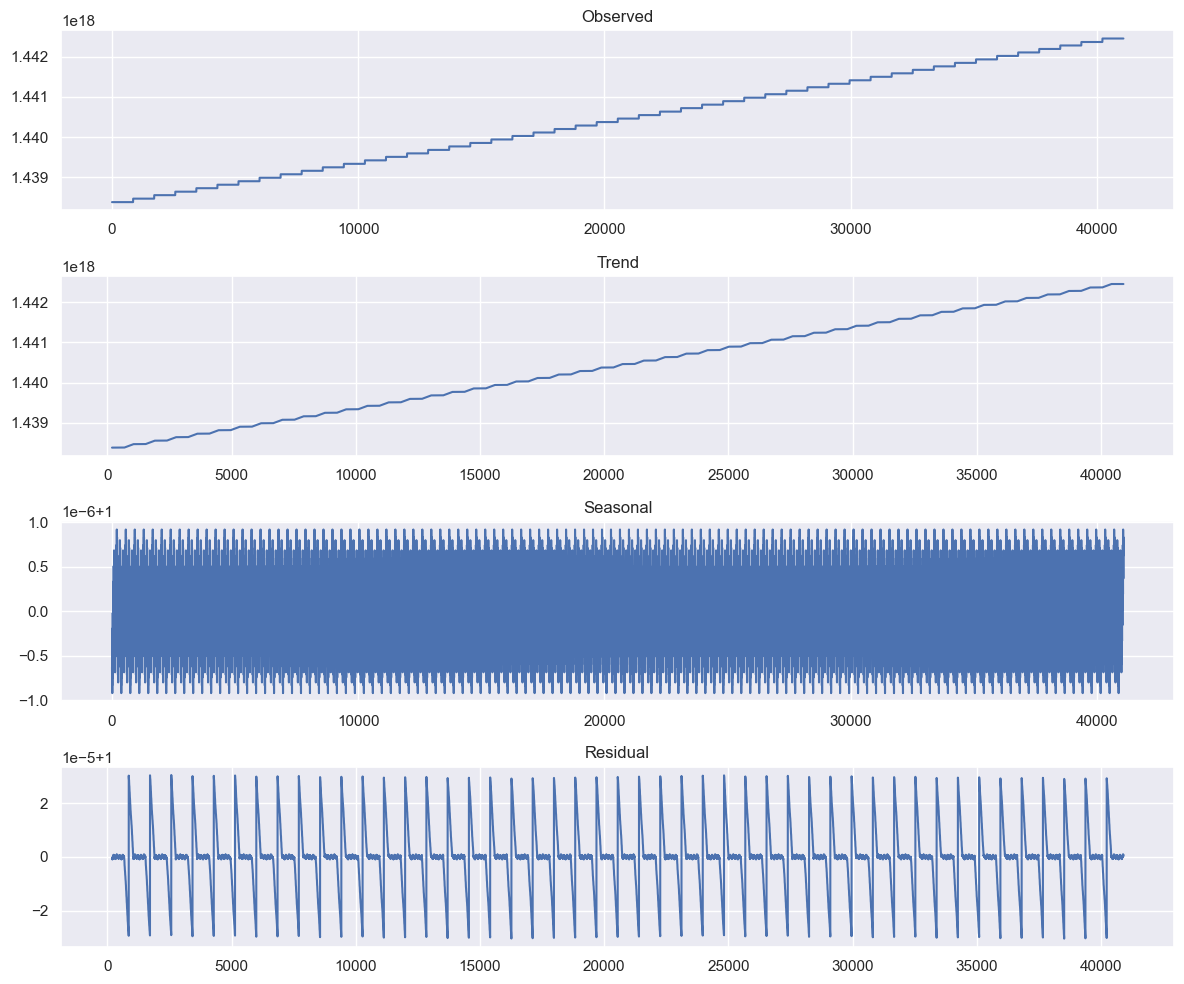

In [27]:
import matplotlib.pyplot as plt

# Data and titles for decomposition components
components = {
    'Observed': decomposition.observed,
    'Trend': decomposition.trend,
    'Seasonal': decomposition.seasonal,
    'Residual': decomposition.resid
}

# Create the figure and axes
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 10))

# Plot each component in its respective subplot
for ax, (title, data) in zip(axes, components.items()):
    ax.set_title(title)
    ax.plot(data)
    ax.grid(True)  # Optional: Add grid for better readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [28]:
train_merged_data.columns

Index(['Date', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

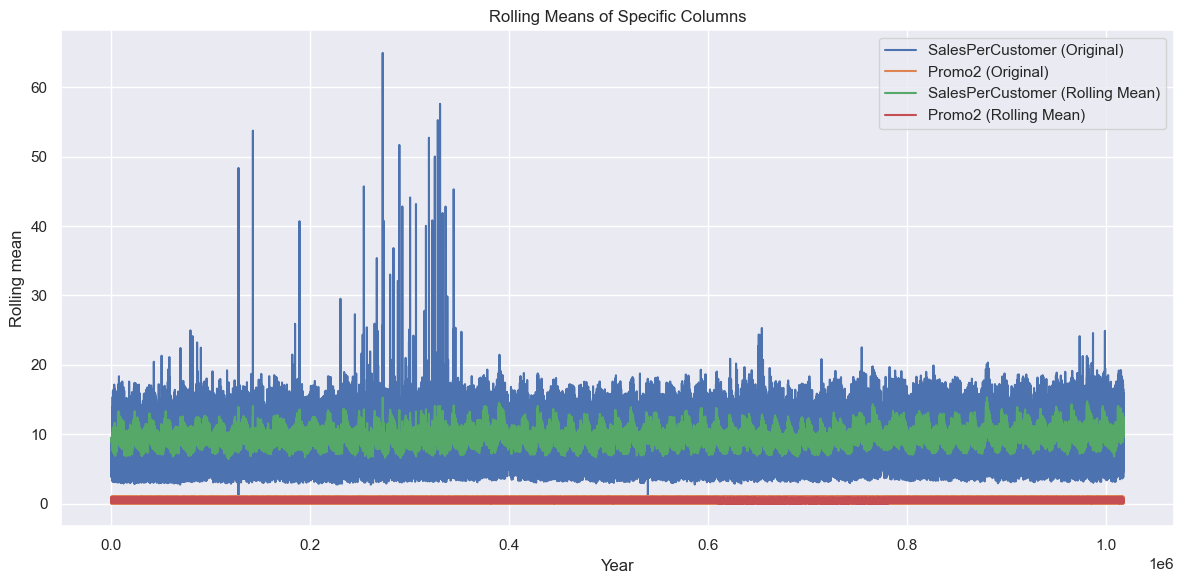

In [29]:
# Specify the columns for which you want to calculate the rolling mean
columns_to_calculate_rolling_mean = ['SalesPerCustomer', 'Promo2']
# Calculate the rolling mean for the specified columns
rolling_mean_window = 10
rolling_means = train_merged_data[columns_to_calculate_rolling_mean].rolling(window=rolling_mean_window).mean()
# Plot the original data and rolling means
plt.figure(figsize=(12, 6))
# Plot the original data
for column in columns_to_calculate_rolling_mean:
    plt.plot(train_merged_data.index, train_merged_data[column], label=f'{column} (Original)')

# Plot the rolling means
for column in columns_to_calculate_rolling_mean:
    plt.plot(rolling_means.index, rolling_means[column], label=f'{column} (Rolling Mean)')

plt.title('Rolling Means of Specific Columns')
plt.xlabel('Year')
plt.ylabel('Rolling mean')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

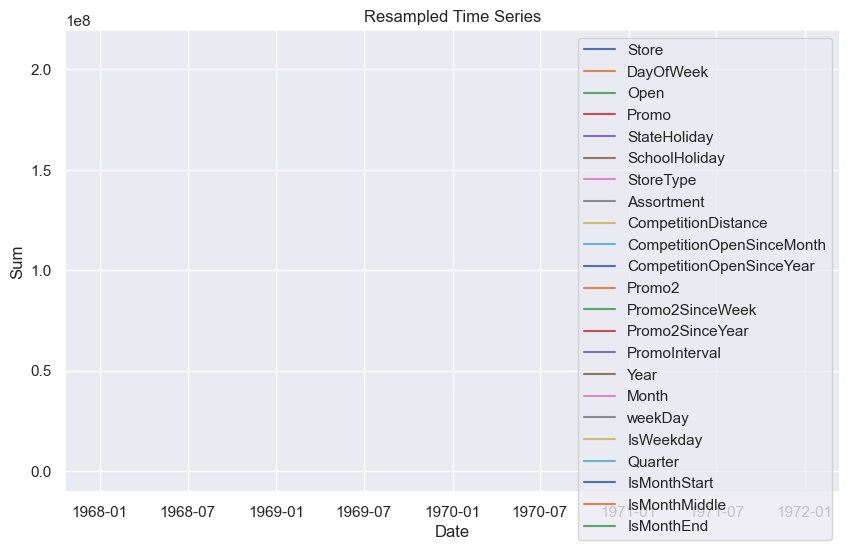

In [30]:
# Convert the index to datetime format
test_merged_data.index = pd.to_datetime(test_merged_data.index)

# Selecting only numeric columns for summation
numeric_columns = test_merged_data.select_dtypes(include=['number']).columns

# Resampling the data
test_data_resampled = test_merged_data[numeric_columns].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(test_data_resampled.index, test_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()

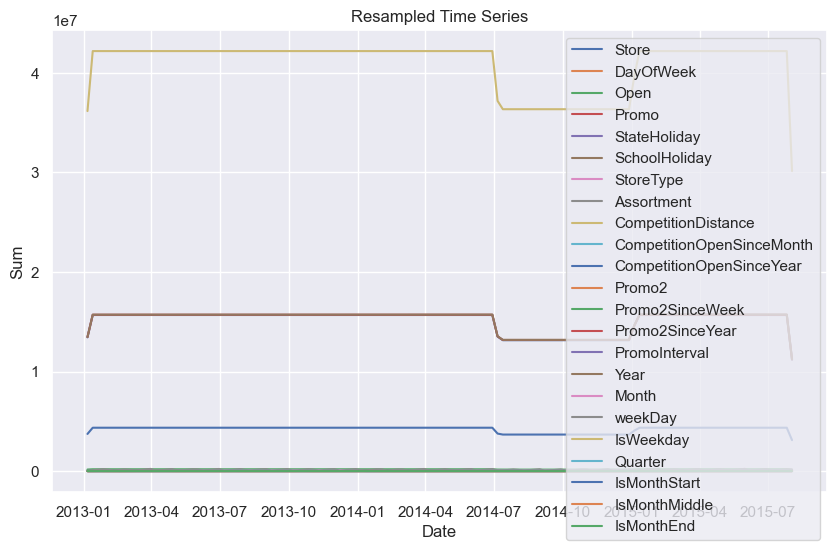

In [31]:
import matplotlib.pyplot as plt

# Ensure that the 'Date' column is of datetime type
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])

# Set 'Date' as the index for resampling
train_merged_data.set_index('Date', inplace=True)

# Resampling the data at a lower frequency (e.g., weekly) for better visualization
resample_frequency = 'W'  # Adjust this frequency as needed
train_data_resampled = train_merged_data[numeric_columns].resample(resample_frequency).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()

In [32]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000041087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       41088 non-null  datetime64[ns]
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int64         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int64         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYe

In [33]:
test_merged_data['SalesPerCustomer'] = test_merged_data['Date'].dt.is_month_start.astype(int)

In [34]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000041087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       41088 non-null  datetime64[ns]
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Open                       41088 non-null  float64       
 4   Promo                      41088 non-null  int64         
 5   StateHoliday               41088 non-null  int64         
 6   SchoolHoliday              41088 non-null  int64         
 7   StoreType                  41088 non-null  int64         
 8   Assortment                 41088 non-null  int64         
 9   CompetitionDistance        41088 non-null  float64       
 10  CompetitionOpenSinceMonth  41088 non-null  float64       
 11  CompetitionOpenSinceYe

In [35]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['SalesPerCustomer']
test_data_weekly_mean = test_merged_data[columns_to_resample].resample('W').mean()

print(test_data_weekly_mean)

            SalesPerCustomer
1970-01-04          0.041667


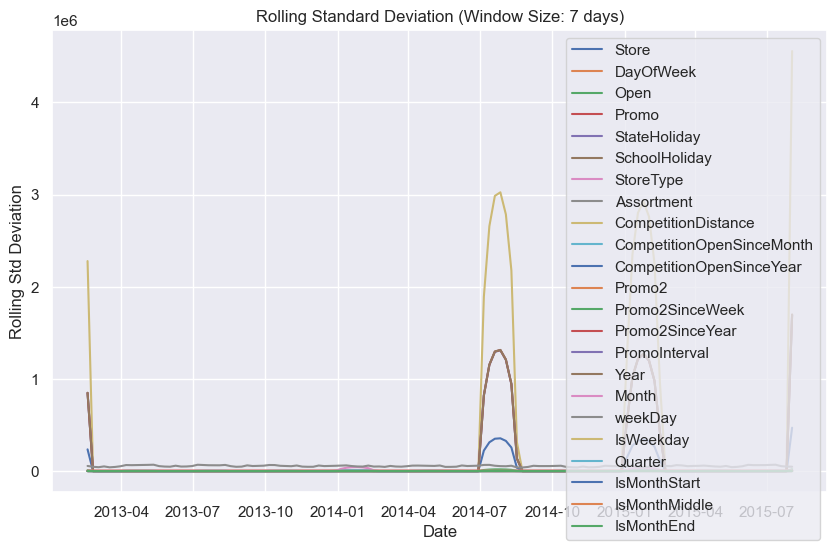

In [36]:
window_size = 7
rolling_std = train_data_resampled.rolling(window=window_size).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)
plt.xlabel('Date')
plt.ylabel('Rolling Std Deviation')
plt.title(f'Rolling Standard Deviation (Window Size: {window_size} days)')
plt.legend()
plt.show()

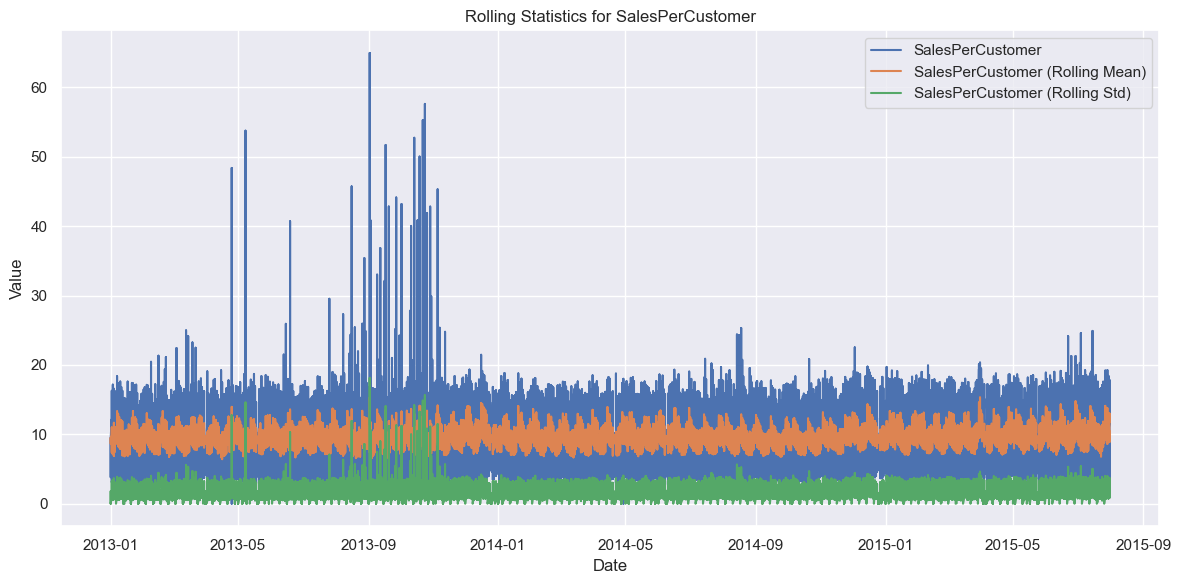

In [37]:
# Specify the column for which you want to calculate rolling statistics
column_to_calculate_rolling_stats = 'SalesPerCustomer'

# Calculate the rolling mean and rolling standard deviation
rolling_window = 10  # You can adjust the window size as needed
rolling_mean = train_merged_data[column_to_calculate_rolling_stats].rolling(window=rolling_window).mean()
rolling_std = train_merged_data[column_to_calculate_rolling_stats].rolling(window=rolling_window).std()

# Create a plot of rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(train_merged_data.index, train_merged_data[column_to_calculate_rolling_stats], label=f'{column_to_calculate_rolling_stats}')
plt.plot(train_merged_data.index, rolling_mean, label=f'{column_to_calculate_rolling_stats} (Rolling Mean)')
plt.plot(train_merged_data.index, rolling_std, label=f'{column_to_calculate_rolling_stats} (Rolling Std)')
plt.title(f'Rolling Statistics for {column_to_calculate_rolling_stats}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
# descriptive statistics of rolling standard deviation and mean
print("Rolling Standard Deviation:")
print(rolling_std.describe())

print("\nRolling Mean:")
print(rolling_mean.describe())

Rolling Standard Deviation:
count    1.017200e+06
mean     1.683802e+00
std      8.390601e-01
min      0.000000e+00
25%      1.375171e+00
50%      1.814254e+00
75%      2.215262e+00
max      1.811716e+01
Name: SalesPerCustomer, dtype: float64

Rolling Mean:
count    1.017200e+06
mean     9.493611e+00
std      9.072133e-01
min      6.418662e+00
25%      8.913753e+00
50%      9.493619e+00
75%      9.966563e+00
max      1.530756e+01
Name: SalesPerCustomer, dtype: float64


In [39]:
import statsmodels.api as sm

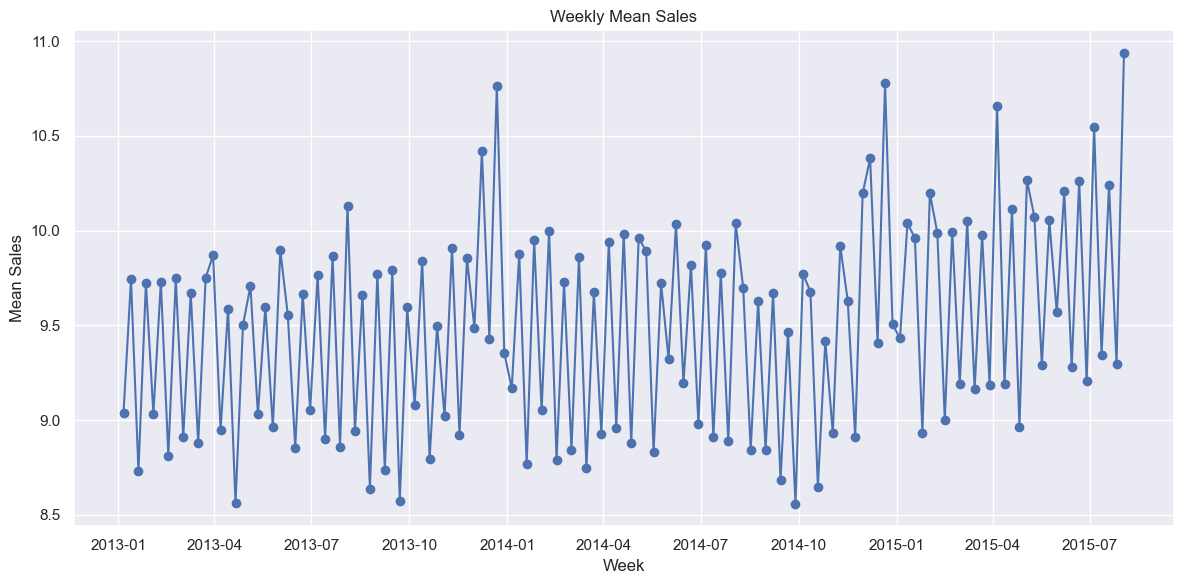

In [40]:
# Resample to weekly frequency and calculate mean sales
weekly_mean_sales = train_merged_data['SalesPerCustomer'].resample('W').mean()

# Create a plot of the weekly mean sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean_sales.index, weekly_mean_sales.values, marker='o', linestyle='-')
plt.title('Weekly Mean Sales')
plt.xlabel('Week')
plt.ylabel('Mean Sales')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
weekly_sales = train_merged_data['SalesPerCustomer'].resample('W').mean()

In [42]:
# Calculate first differences
diff_series = weekly_sales.diff(periods=1).dropna()

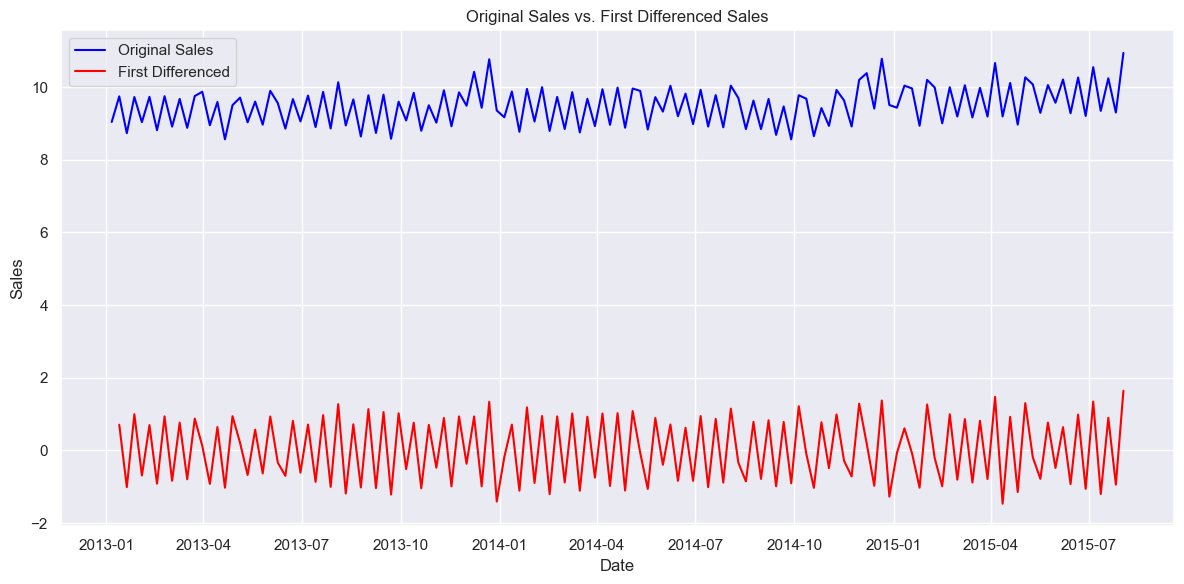

In [43]:
# Create a single plot
plt.figure(figsize=(12, 6))

# Original time series
plt.plot(weekly_sales, label='Original Sales', color='blue')

# First differenced series
plt.plot(diff_series, label='First Differenced', color='red')

plt.title('Original Sales vs. First Differenced Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

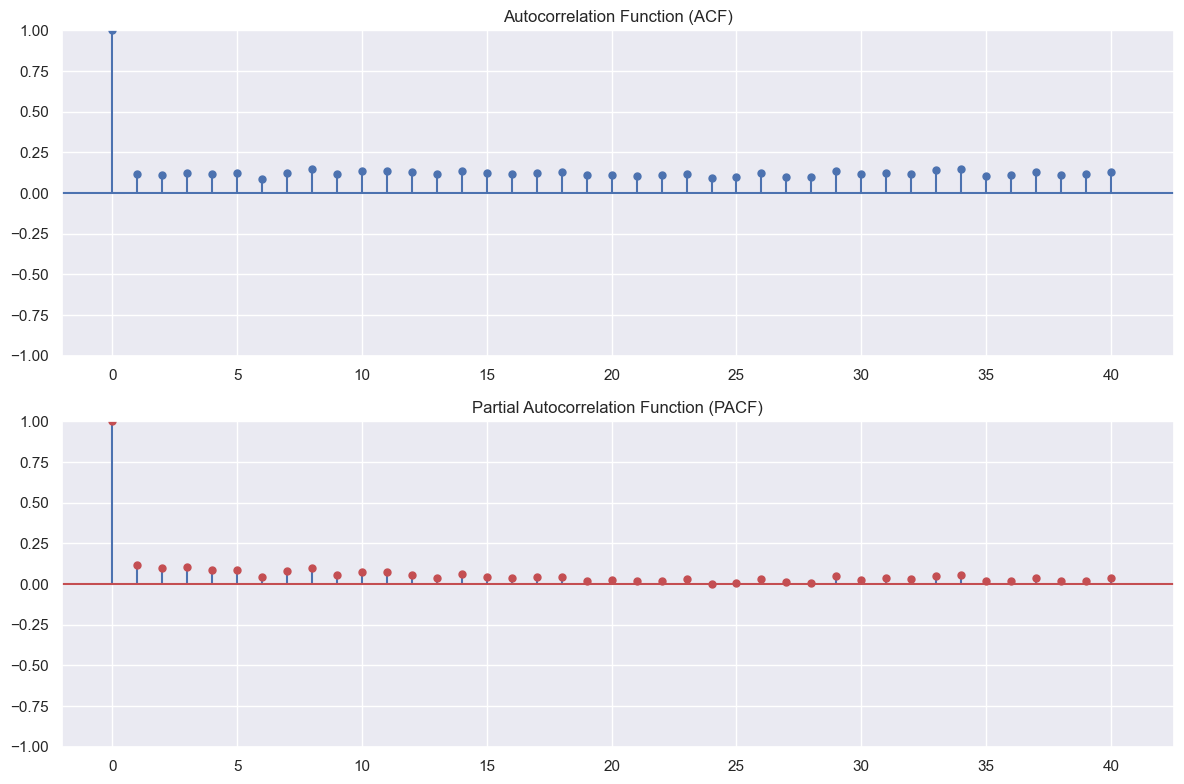

In [46]:
# Create subplots for ACF and PACF in a single figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF with blue color
plot_acf(train_merged_data['SalesPerCustomer'], lags=40, ax=ax1, color='b', title='Autocorrelation Function (ACF)')

# Plot PACF with red color
plot_pacf(train_merged_data['SalesPerCustomer'], lags=40, ax=ax2, color='r', title='Partial Autocorrelation Function (PACF)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

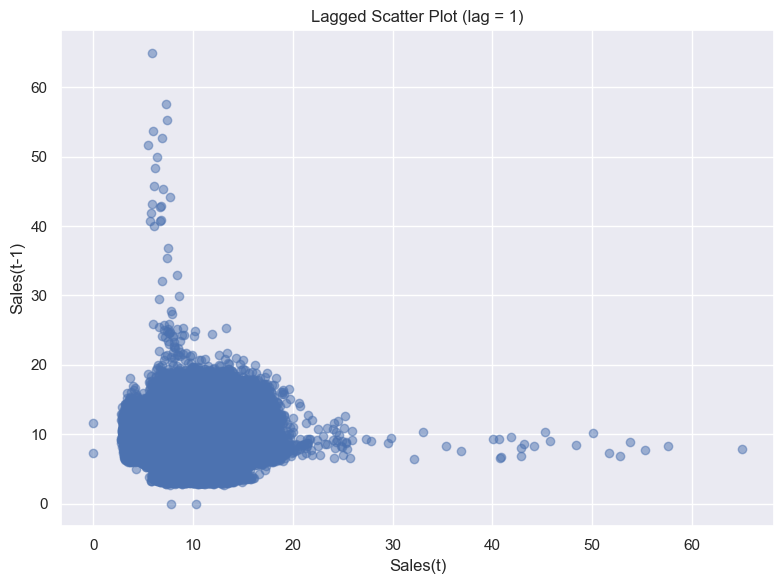

In [47]:
lag = 1  # Adjust the lag as needed

# Create a lagged DataFrame
lagged_df = train_merged_data.shift(periods=lag)

# Plot the lagged scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_merged_data['SalesPerCustomer'], lagged_df['SalesPerCustomer'], alpha=0.5)
plt.title(f'Lagged Scatter Plot (lag = {lag})')
plt.xlabel('Sales(t)')
plt.ylabel(f'Sales(t-{lag})')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

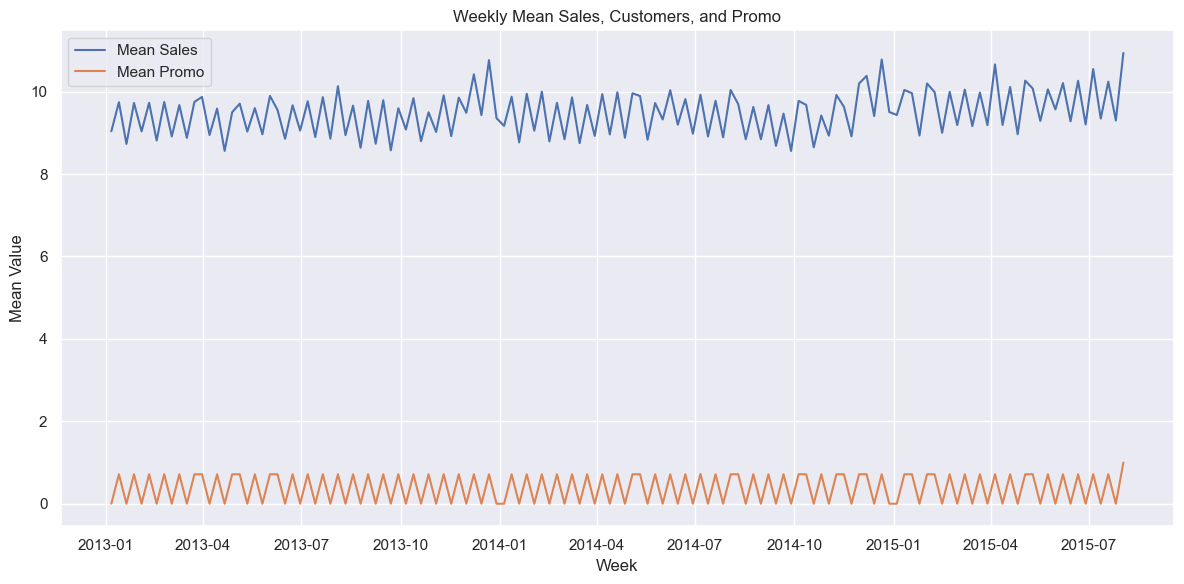

In [48]:
 #Resample to weekly frequency and calculate mean values
weekly_mean = train_merged_data.resample('W').mean()

# Create a plot for mean sales, mean customers, and mean promo
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean.index, weekly_mean['SalesPerCustomer'], label='Mean Sales')

plt.plot(weekly_mean.index, weekly_mean['Promo'], label='Mean Promo')
plt.title('Weekly Mean Sales, Customers, and Promo')
plt.xlabel('Week')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

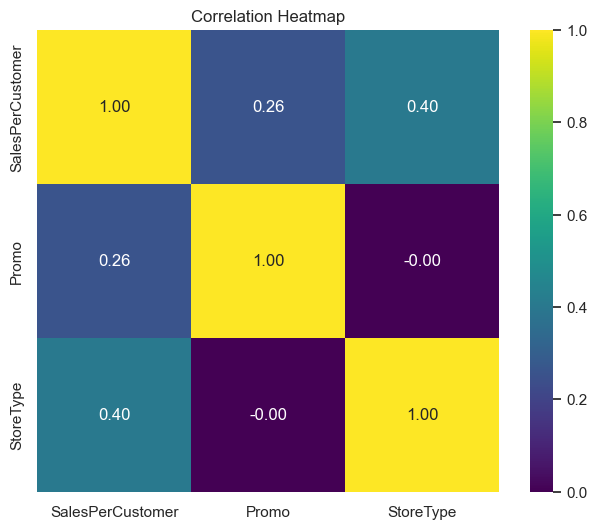

In [58]:
selected_columns = ['SalesPerCustomer', 'Promo','StoreType']


# Calculate the correlation matrix
correlation_matrix = train_merged_data[selected_columns].corr()
custom_cmap = 'viridis'
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap,fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

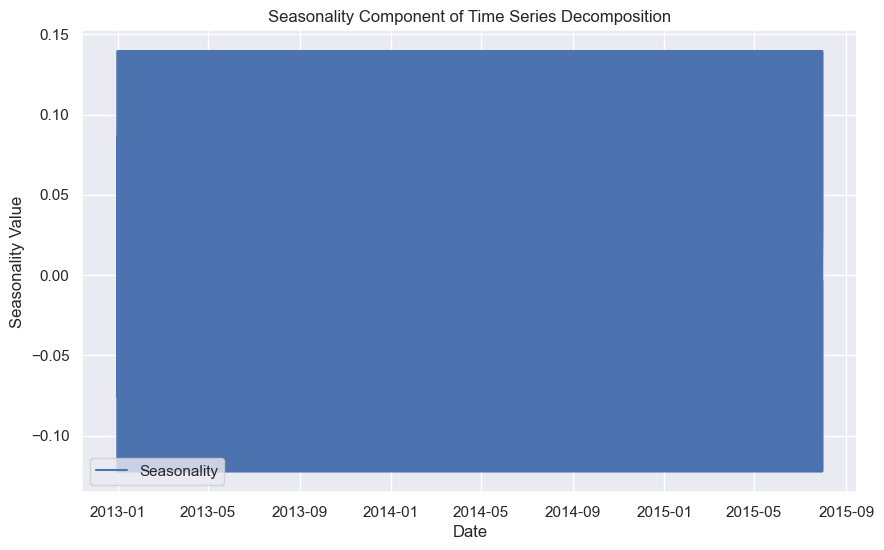

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing time series decomposition on the 'Sales' column with yearly frequency
decomposition_result = seasonal_decompose(train_merged_data['SalesPerCustomer'], model='additive', period=365)
seasonality_data = decomposition_result.seasonal

# Create a time index for the x-axis (assuming 'Date' is your index)
time_index = seasonality_data.index

# Plot the seasonality component
plt.figure(figsize=(10, 6))
plt.plot(time_index, seasonality_data, label='Seasonality')
plt.title('Seasonality Component of Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonality Value')
plt.legend()
plt.show()

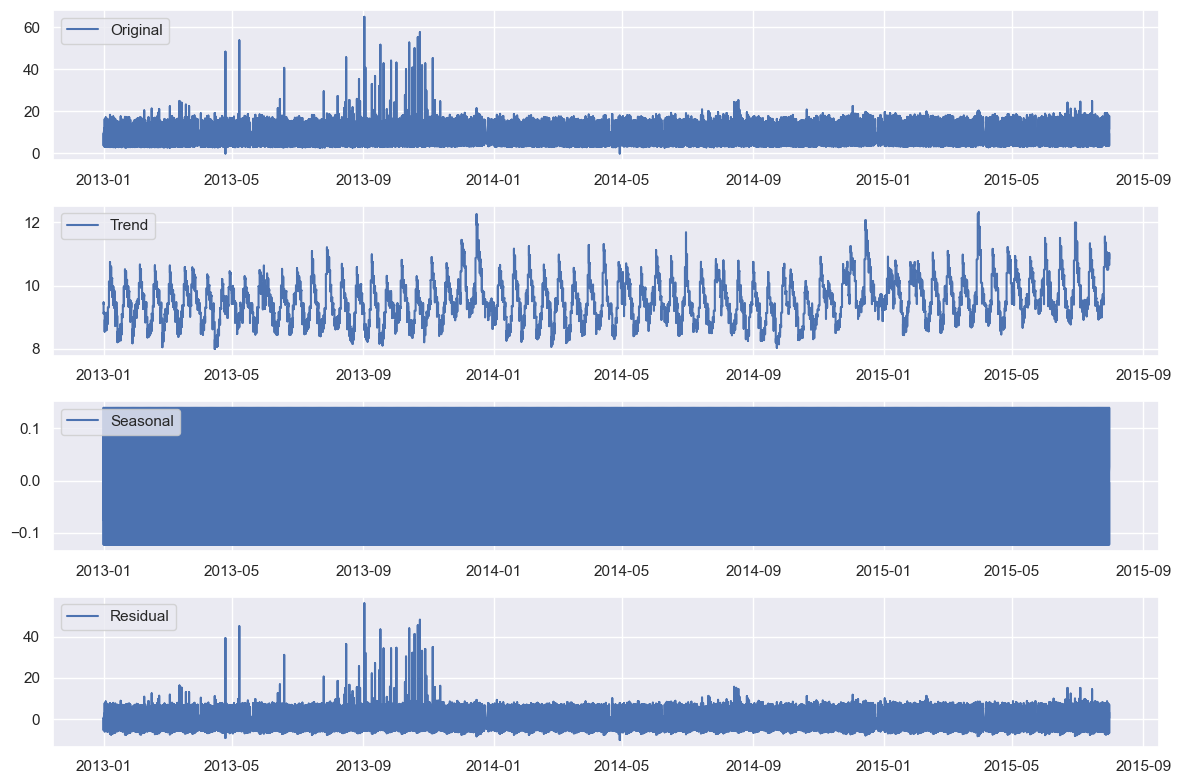

In [60]:
decomposition = sm.tsa.seasonal_decompose(train_merged_data['SalesPerCustomer'], period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original sales data
plt.subplot(411)
plt.plot(train_merged_data['SalesPerCustomer'], label='Original')
plt.legend(loc='upper left')

# Trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [61]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

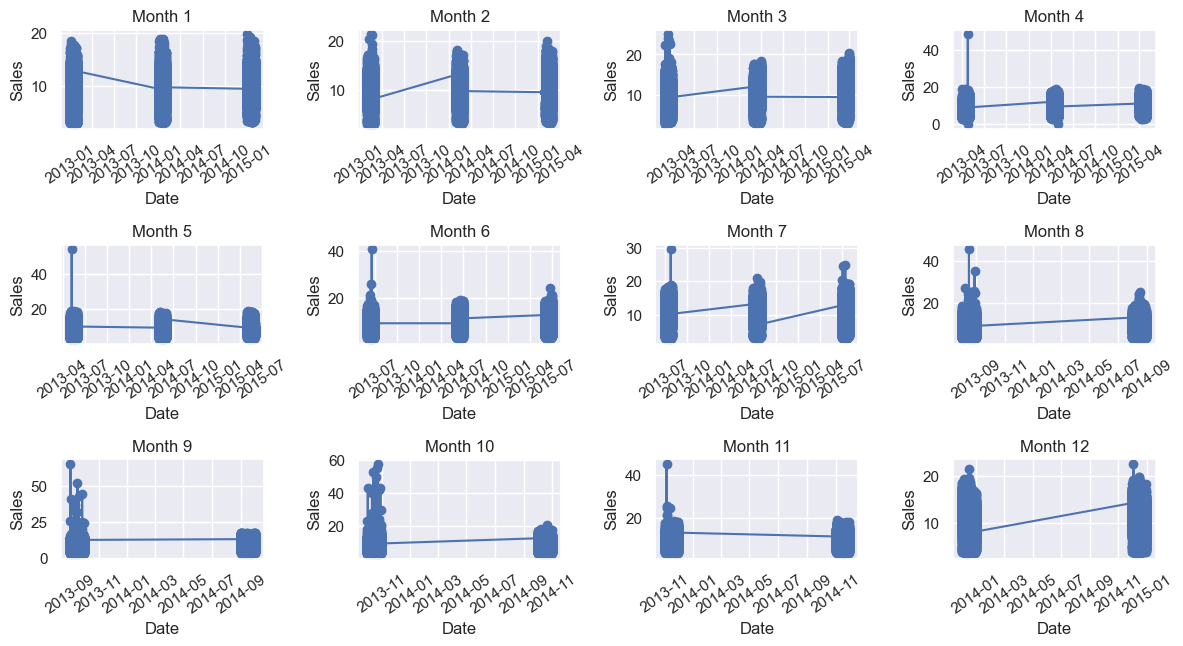

In [62]:
# Extract the month from the 'Date' column
train_merged_data['Month'] = train_merged_data.index.month

# Create a Seasonal Subseries Plot
plt.figure(figsize=(12, 8))

# Iterate through each month and create subplots
for i in range(1, 13):  # Assuming data spans all 12 months
    month_data = train_merged_data[train_merged_data['Month'] == i]  # Extract data for the current month
    plt.subplot(4, 4, i)  # Create a subplot for the current month
    plt.plot(month_data.index, month_data['SalesPerCustomer'], marker='o', linestyle='-')
    plt.title(f'Month {i}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=35)
    plt.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

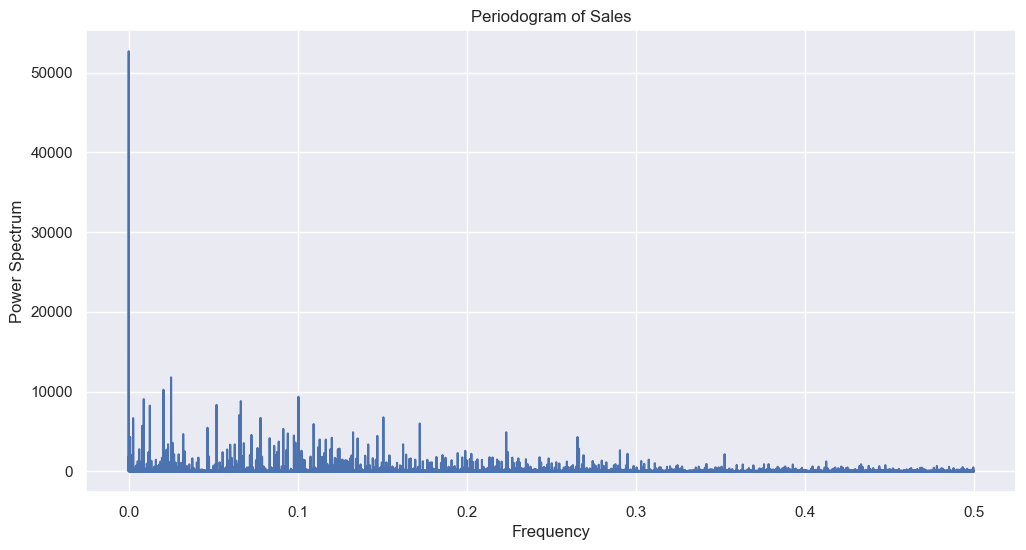

In [63]:
# Periodogram
from scipy.signal import periodogram

# Computing the periodogram of the time series
frequencies, power_spectrum = periodogram(train_merged_data['SalesPerCustomer'])

# Plotting the periodogram
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram of Sales')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()

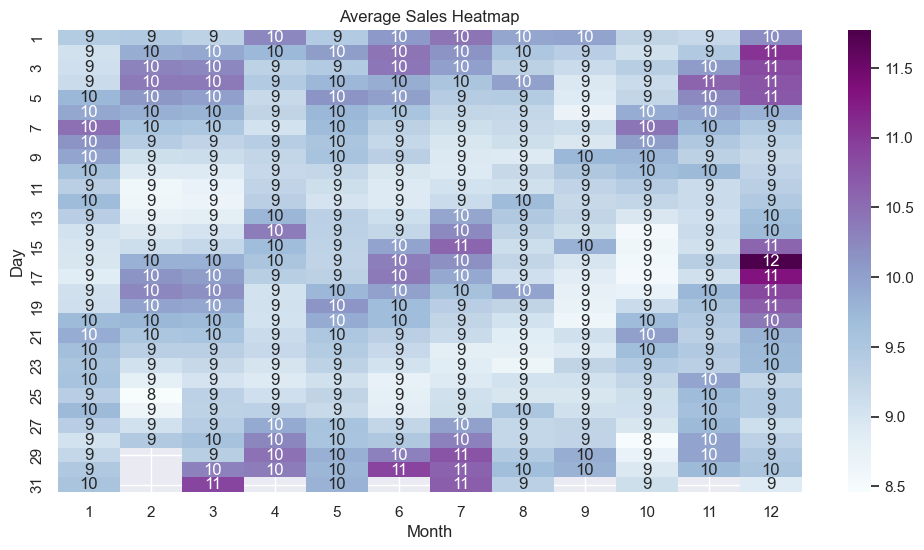

In [64]:
# Heatmap
import numpy as np

# heatmap of average sales across days and months
heatmap_data =train_merged_data.pivot_table(values='SalesPerCustomer', index=train_merged_data.index.day, columns=train_merged_data.index.month, aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="BuPu", annot=True, fmt=".0f")
plt.title('Average Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()

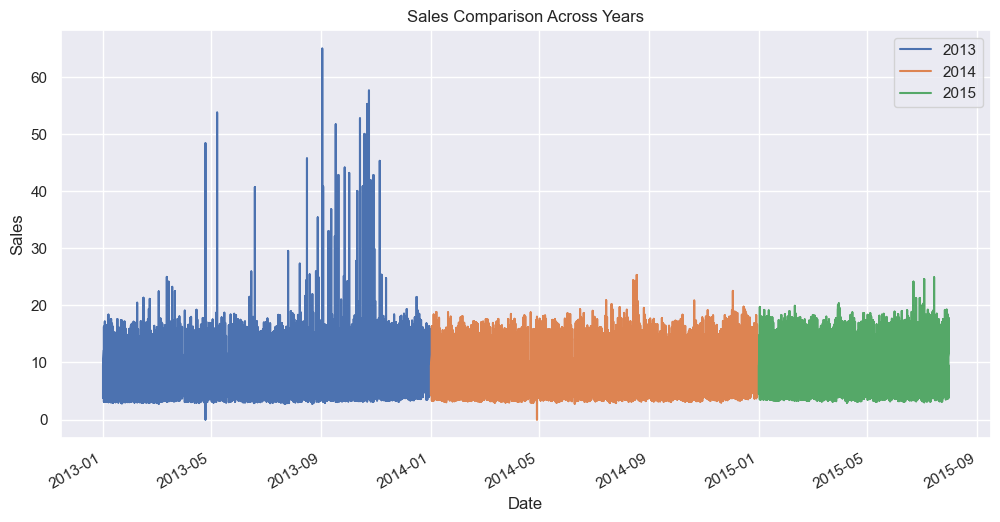

In [65]:
# Create a filter for each year and generate plots
sales_2013 = train_merged_data[train_merged_data.index.year == 2013]['SalesPerCustomer']
sales_2014 = train_merged_data[train_merged_data.index.year == 2014]['SalesPerCustomer']
sales_2015 = train_merged_data[train_merged_data.index.year == 2015]['SalesPerCustomer']
# Plotting comparison across years
plt.figure(figsize=(12, 6))
sales_2013.plot(label='2013')
sales_2014.plot(label='2014')
sales_2015.plot(label='2015')
plt.title('Sales Comparison Across Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

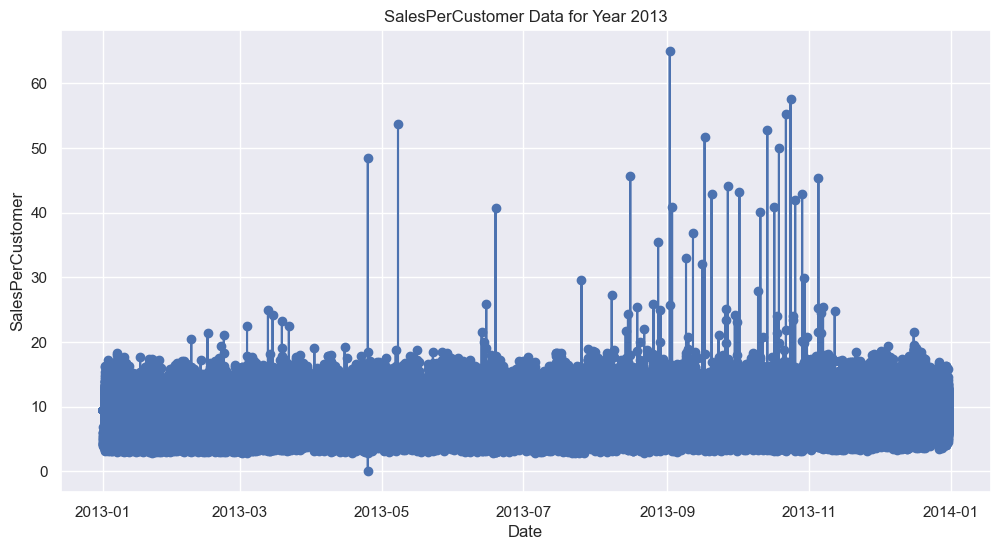

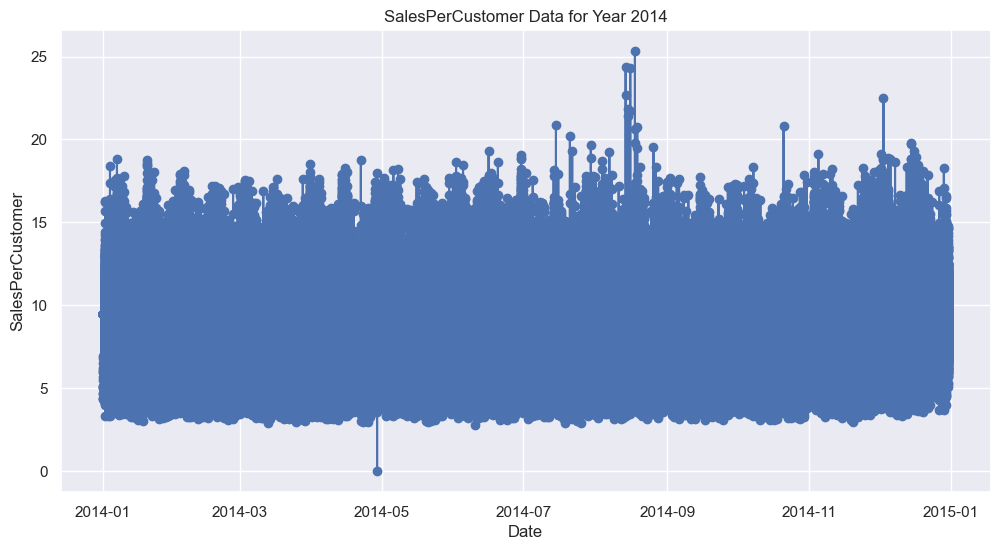

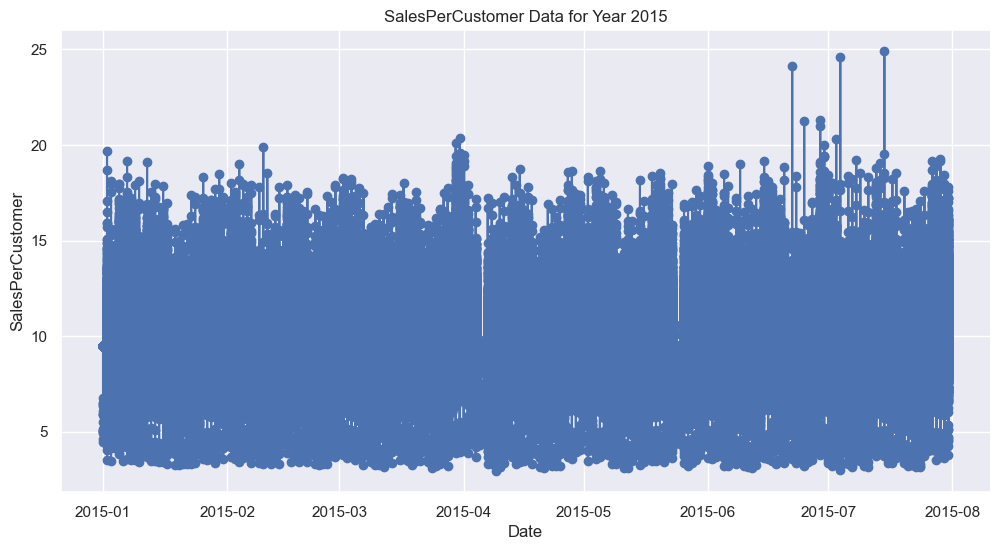

In [66]:
# Set the 'Date' column as the index (if not already)
train_merged_data.index = pd.to_datetime(train_merged_data.index)

# Create a list of years to loop through
years = [2013, 2014, 2015]

# Generate separate plots for each year
for year in years:
    sales_data = train_merged_data[train_merged_data.index.year == year]['SalesPerCustomer']

    # Create a plot for each year
    plt.figure(figsize=(12, 6))
    plt.plot(sales_data.index, sales_data, marker='o', linestyle='-')
    plt.title(f'SalesPerCustomer Data for Year {year}')
    plt.xlabel('Date')
    plt.ylabel('SalesPerCustomer')
    plt.grid(True)

    # Save the plot or display it as needed
    # To save the plot as an image file, use plt.savefig(f'sales_{year}.png')

    plt.show()

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
time_series = train_merged_data['SalesPerCustomer']

Text(0, 0.5, 'SalesPerCustomer')

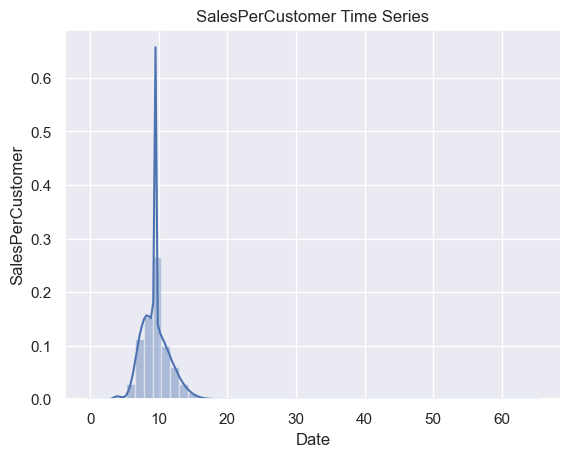

In [69]:
sns.distplot(train_merged_data['SalesPerCustomer'])
plt.title('SalesPerCustomer Time Series')
plt.xlabel('Date')
plt.ylabel('SalesPerCustomer')

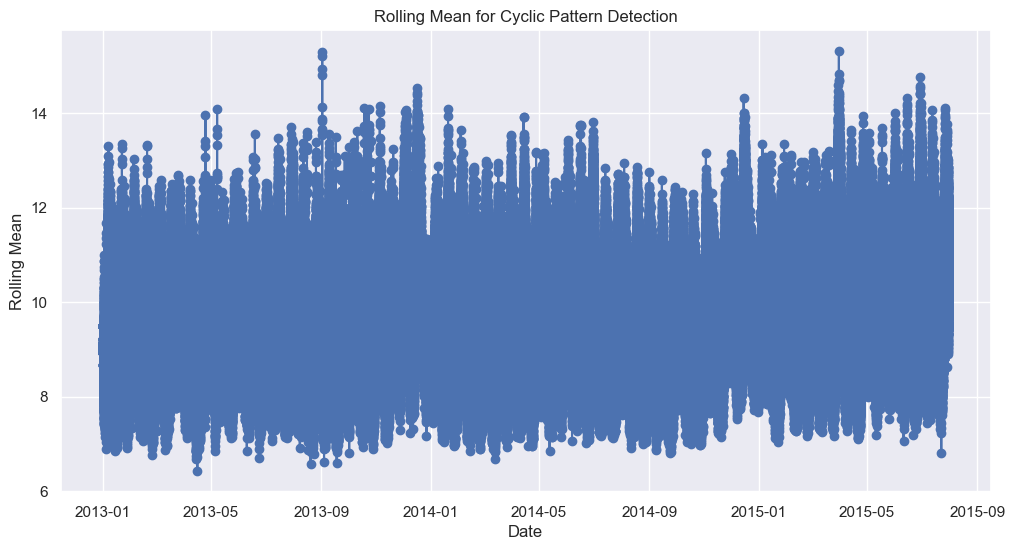

In [70]:
window_size = 10  #
rolling_mean = train_merged_data['SalesPerCustomer'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot( train_merged_data.index, rolling_mean, marker='o', linestyle='-')
plt.title('Rolling Mean for Cyclic Pattern Detection')
plt.xlabel('Date')
plt.ylabel('Rolling Mean')
plt.grid(True)
plt.show()

In [71]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [72]:
# Define a function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_merged_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -30.257282449946093
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


In [73]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Subsample a portion of the time series
subsample_size = 1000
subsampled_series = train_merged_data['SalesPerCustomer'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -16.026833557131965
p-value: 6.118278196218506e-29
Critical Values: {'1%': -3.4369325637409154, '5%': -2.8644462162311934, '10%': -2.568317409920808}
Is Stationary: True


In [74]:
# Resample the time series data to a larger time interval (e.g., monthly)
monthly_aggregated_series = train_merged_data['SalesPerCustomer'].resample('M').sum()

# Perform the ADF test on the aggregated series
adf_test(monthly_aggregated_series)

ADF Statistic: -2.730534104187798
p-value: 0.06890192551500172
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}
Is Stationary: False


## ARIMA (AutoRegressive Integrated Moving Average):

#### ARIMA models are versatile and can handle both trend and seasonality in data. They consist of three main components: AutoRegressive (AR) terms, Integrated (I) terms for differencing, and Moving Average (MA) terms. Model selection involves determining the order of these components (p, d, q) based on ACF and PACF plots. You can use functions like auto_arima from the pmdarima library for automatic ARIMA order selection. SARIMA (Seasonal ARIMA)

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       SalesPerCustomer   No. Observations:              1017209
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -2089103.193
Date:                Tue, 19 Nov 2024   AIC                        4178212.387
Time:                        16:26:56   BIC                        4178247.884
Sample:                             0   HQIC                       4178222.149
                            - 1017209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0049      0.001     -5.324      0.000      -0.007      -0.003
ma.L1         -0.9908      0.000  -8240.827      0.000      -0.991      -0.991
sigma2         3.5596      0.003   1323.958      0.0

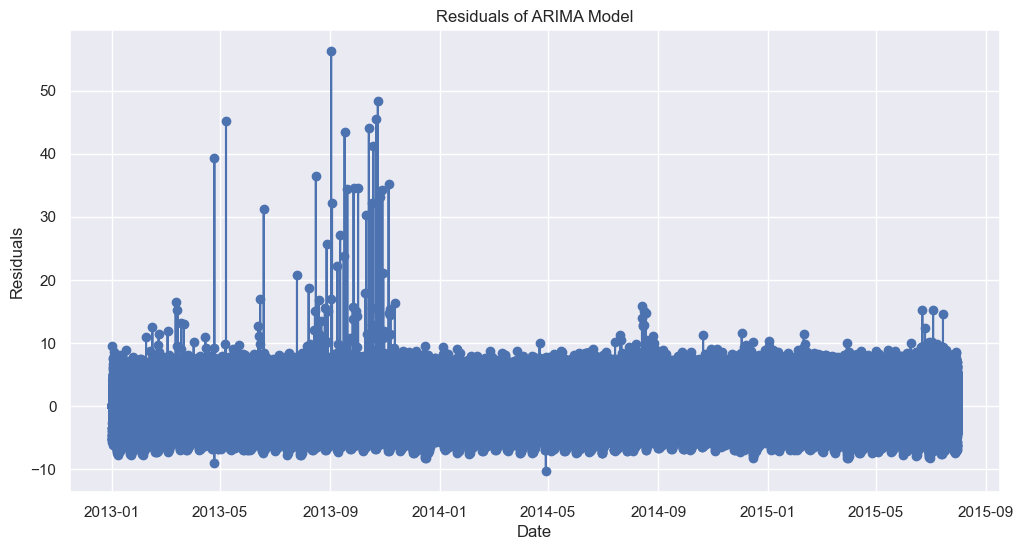

In [77]:
p = 1  # Replace with the determined AR order
d = 1  # Replace with the determined differencing order
q = 1  # Replace with the determined MA order

arima_model = sm.tsa.ARIMA(train_merged_data['SalesPerCustomer'], order=(p, d, q))
arima_results = arima_model.fit()

# Print the model summary
print(arima_results.summary())
# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(arima_results.resid.index, arima_results.resid, marker='o', linestyle='-')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

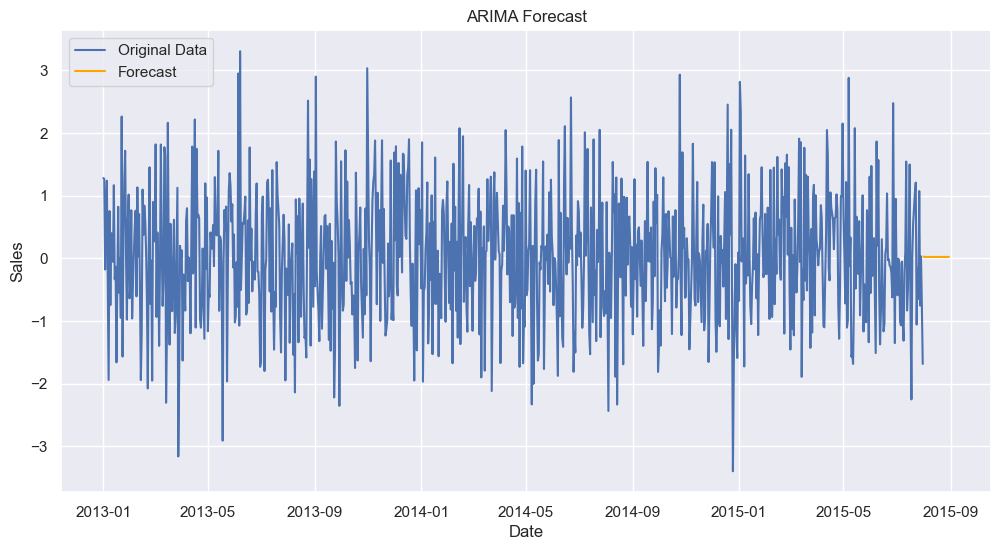

In [78]:
from statsmodels.tsa.arima.model import ARIMA


time_series_data = train_merged_data['SalesPerCustomer']

min_date = pd.to_datetime('2013-01-01')
max_date = pd.to_datetime('2015-07-31')
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [79]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller


print(train_merged_data.dtypes)


# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_merged_data.resample('M')['SalesPerCustomer'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic ARIMA order selection
model = auto_arima(monthly_sales, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=d, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit the ARIMA model
model_fit = model.fit(monthly_sales)

# Print the model summary
print(model_fit.summary())

Store                          int64
DayOfWeek                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
Year                           int64
Month                          int64
weekDay                        int64
IsWeekday                      int64
Quarter                        int64
SalesPerCustomer             float64
IsMonthStart                   int64
IsMonthMiddle                  int64
IsMonthEnd                     int64
dtype: object
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=417.820, Tim

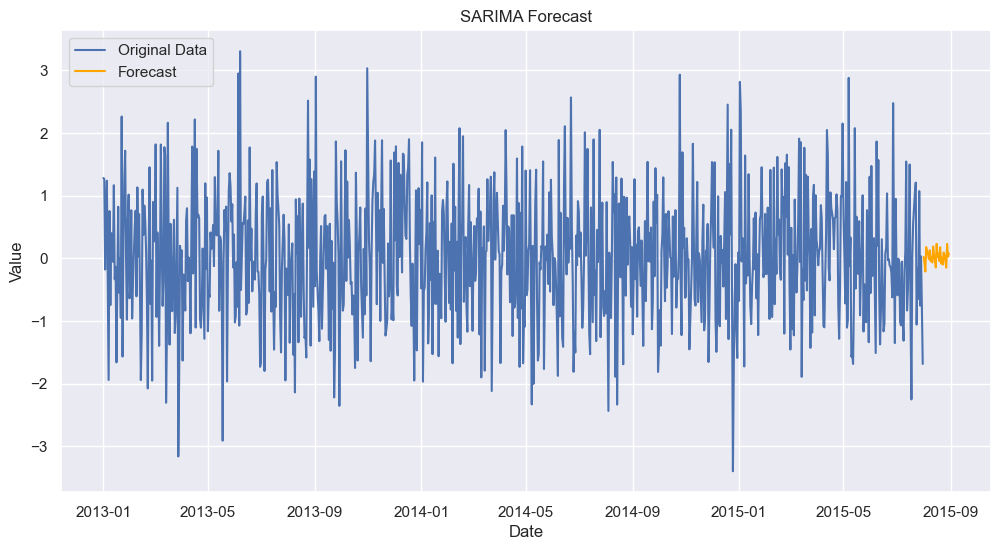

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model
model = SARIMAX(time_series_data, order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [81]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


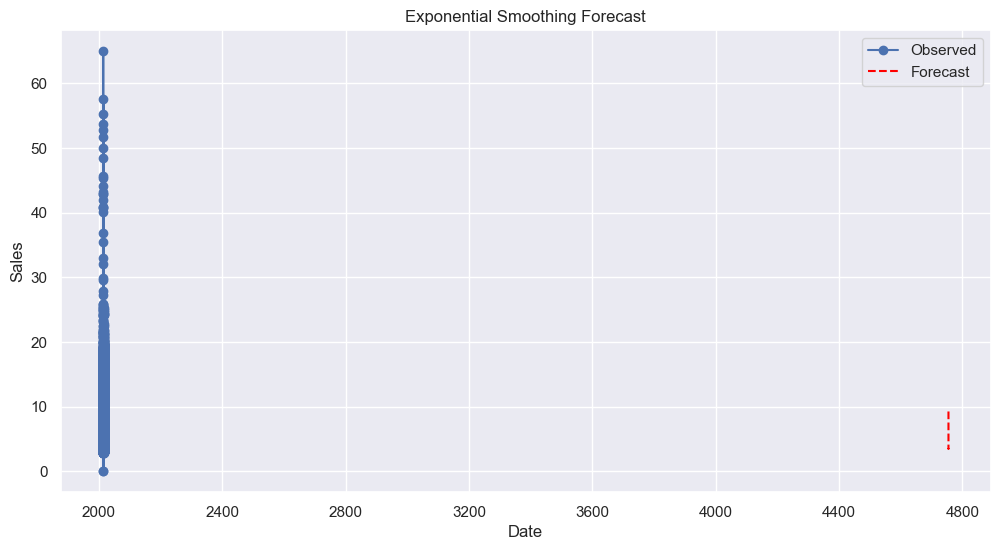

In [82]:
# Define the parameters for exponential smoothing
smoothing_level = 0.8  # Smoothing parameter for level
smoothing_trend = 0.2  # Smoothing parameter for trend
seasonal_periods = 12  # Number of seasons per year (e.g., 12 for monthly data)

# Perform exponential smoothing
model = ExponentialSmoothing(
    train_merged_data['SalesPerCustomer'],
    trend='add',  # 'add' for additive trend, 'multiplicative' for multiplicative trend
    seasonal='add',  # 'add' for additive seasonality, 'multiplicative' for multiplicative seasonality
    seasonal_periods=seasonal_periods,
    initialization_method="estimated",
)
result = model.fit(smoothing_level=smoothing_level, smoothing_trend=smoothing_trend)

# Generate forecasts
forecast_steps = 12  # Adjust the number of forecast steps as needed
forecast = result.forecast(steps=forecast_steps)

# Plot the observed data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_merged_data.index,  train_merged_data['SalesPerCustomer'], label='Observed', marker='o', linestyle='-')
plt.plot(forecast.index, forecast, label='Forecast', color='red', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NITESH NAMDEV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

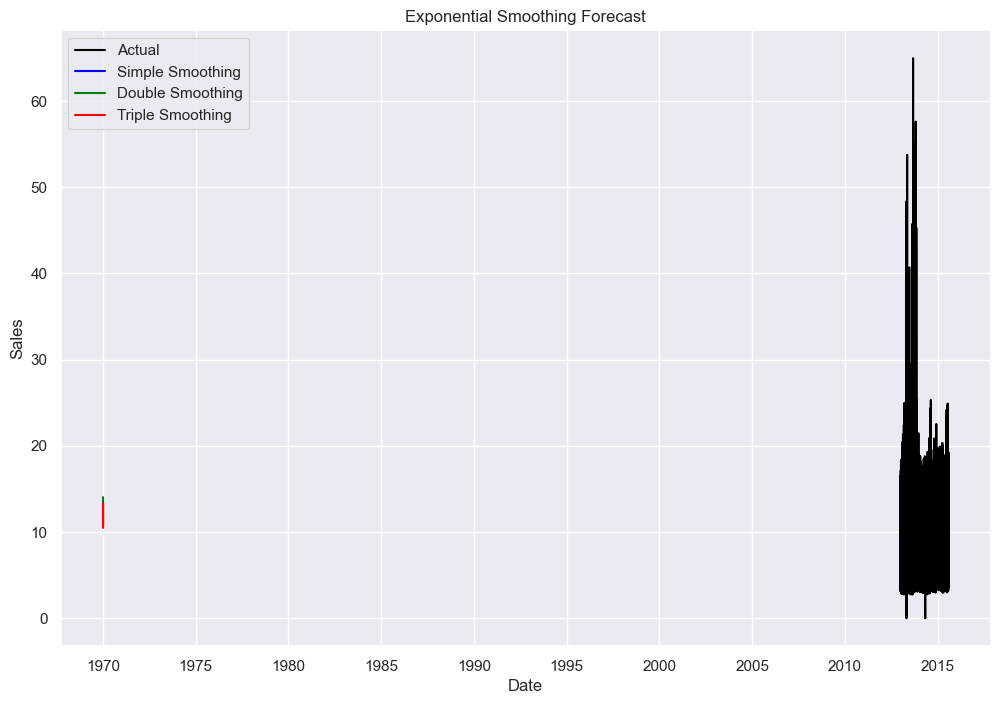

In [83]:
# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series, trend=None, seasonal=None)
model_fit_simple = model_simple.fit()
predictions_simple = model_fit_simple.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Double Exponential Smoothing (Holt's Method)
model_double = ExponentialSmoothing(time_series, trend='add', seasonal=None)
model_fit_double = model_double.fit()
predictions_double = model_fit_double.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Triple Exponential Smoothing (Holt-Winters' Method)
model_triple = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=7)
model_fit_triple = model_triple.fit()
predictions_triple = model_fit_triple.predict(start=len(time_series), end=len(time_series) + len(test_merged_data) - 1)

# Plot actual vs. predicted values for all methods
plt.figure(figsize=(12, 8))
plt.plot(time_series, label='Actual', color='black')
plt.plot(test_merged_data.index, predictions_simple, label='Simple Smoothing', color='blue')
plt.plot(test_merged_data.index, predictions_double, label="Double Smoothing", color='green')
plt.plot(test_merged_data.index, predictions_triple, label="Triple Smoothing", color='red')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

16:51:14 - cmdstanpy - INFO - Chain [1] start processing
16:56:23 - cmdstanpy - INFO - Chain [1] done processing


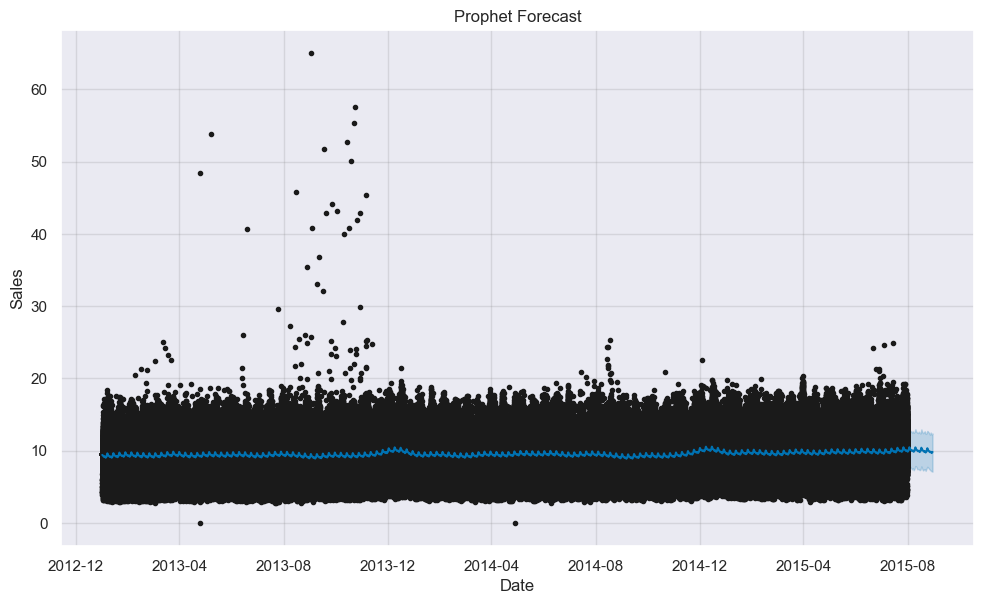

In [85]:
from prophet import Prophet

# Reset the index of the train_data_merged DataFrame
train_data_reset_index = train_merged_data.reset_index()

train_data_prophet = train_data_reset_index[['Date', 'SalesPerCustomer']].rename(columns={'Date': 'ds', 'SalesPerCustomer': 'y'})

# Create a sample time series data using the min and max dates
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.DataFrame({'ds': date_rng, 'y': range(len(date_rng))})

# Fit Prophet model
model = Prophet()
model.fit(train_data_prophet)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=30)

# Make predictions for the next 30 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [88]:
from tensorflow import keras
selected_column ='SalesPerCustomer'
time_series_data = train_merged_data[selected_column].values

In [89]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(time_series_data.reshape(-1, 1))
look_back = 10
# Prepare the input sequences and target values
X = []
y = []
for i in range(len(normalized_data) - look_back):
    X.append(normalized_data[i:i + look_back])
    y.append(normalized_data[i + look_back])
X = np.array(X)
y = np.array(y)

# Split the data into training and validation sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

Epoch 1/5
25430/25430 - 196s - 8ms/step - loss: 8.8224e-04 - val_loss: 9.4855e-04
Epoch 2/5
25430/25430 - 196s - 8ms/step - loss: 8.7278e-04 - val_loss: 9.4672e-04
Epoch 3/5
25430/25430 - 192s - 8ms/step - loss: 8.7070e-04 - val_loss: 9.4400e-04
Epoch 4/5
25430/25430 - 193s - 8ms/step - loss: 8.6921e-04 - val_loss: 9.3530e-04
Epoch 5/5
25430/25430 - 196s - 8ms/step - loss: 8.6759e-04 - val_loss: 9.4807e-04


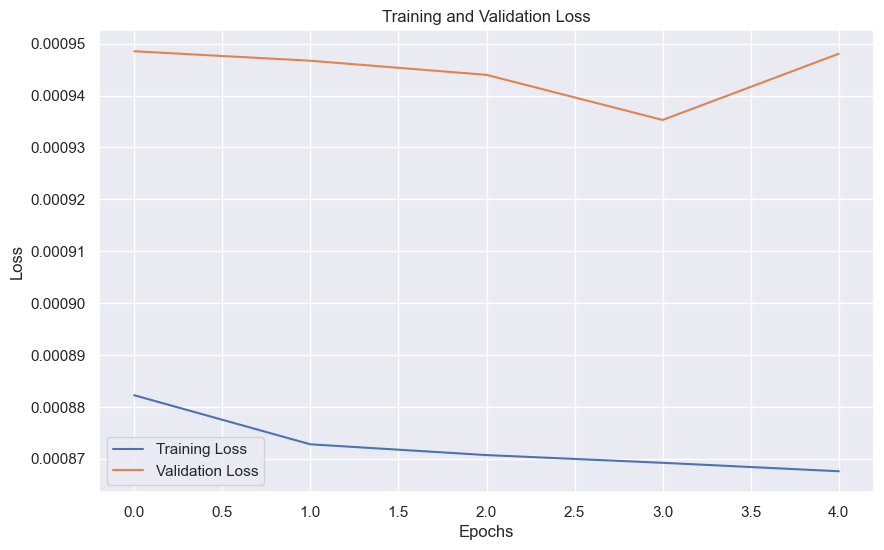

In [90]:
# Build the LSTM model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=64, input_shape=(look_back, 1)))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

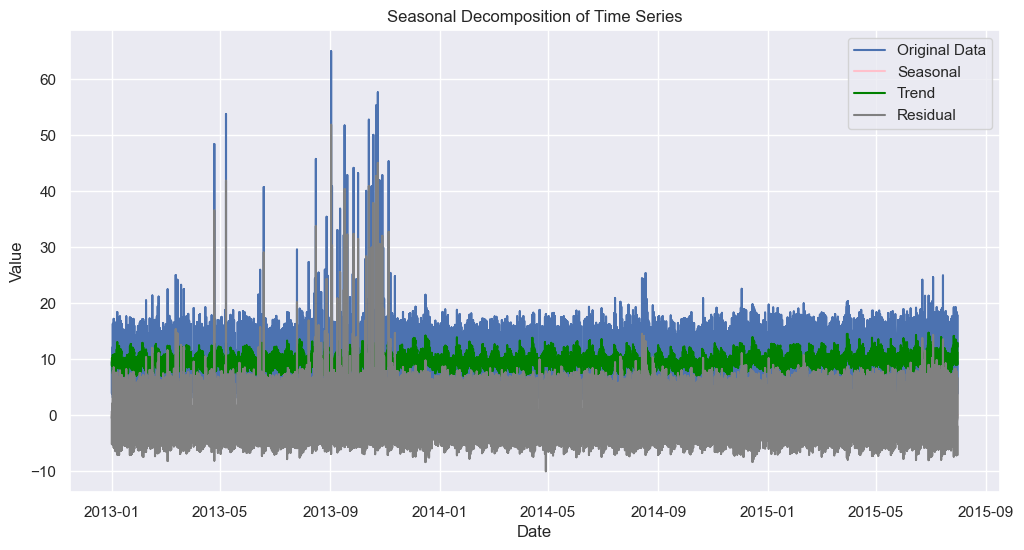

In [91]:
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

selected_column ='SalesPerCustomer'

# Perform seasonal decomposition using statsmodels
decomposition = seasonal_decompose(train_merged_data[selected_column], period=13)

# Get the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 6))
plt.plot(train_merged_data[selected_column], label='Original Data')
plt.plot(seasonal, label='Seasonal', color='Pink')
plt.plot(trend, label='Trend', color='green')
plt.plot(residual, label='Residual', color='gray')
plt.legend()
plt.title('Seasonal Decomposition of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [92]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [93]:
import pickle
# Save the model using pickle
with open('lstm_model.pickle', 'wb') as f:
    pickle.dump(model, f)